In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Load and preprocess MNIST dataset
(x_train_mnist, y_train_mnist), (x_test_mnist, y_test_mnist) = tf.keras.datasets.mnist.load_data()
x_train_mnist = x_train_mnist[..., np.newaxis] / 255.0
x_test_mnist = x_test_mnist[..., np.newaxis] / 255.0
y_train_mnist = tf.keras.utils.to_categorical(y_train_mnist, 10)
y_test_mnist = tf.keras.utils.to_categorical(y_test_mnist, 10)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
# Define CNN model
def create_cnn(input_shape, activation_fn):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation=activation_fn, input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation=activation_fn),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation=activation_fn),
        layers.Flatten(),
        layers.Dense(64, activation=activation_fn),
        layers.Dense(10, activation='softmax')
    ])
    return model

In [ ]:
# Parameters
activation_fn = 'relu'  # Selected based on Exercise 1
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)  # Selected optimizer
batch_size = 64
epochs = 10

In [ ]:
# Create and compile model
model = create_cnn(x_train_mnist.shape[1:], activation_fn)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Train model
history = model.fit(
    x_train_mnist, y_train_mnist,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(x_test_mnist, y_test_mnist),
    verbose=1
)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8775 - loss: 0.3988 - val_accuracy: 0.9835 - val_loss: 0.0533
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9825 - loss: 0.0551 - val_accuracy: 0.9876 - val_loss: 0.0401
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9893 - loss: 0.0334 - val_accuracy: 0.9891 - val_loss: 0.0334
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9919 - loss: 0.0264 - val_accuracy: 0.9878 - val_loss: 0.0386
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9931 - loss: 0.0217 - val_accuracy: 0.9914 - val_loss: 0.0279
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9949 - loss: 0.0169 - val_accuracy: 0.9883 - val_loss: 0.0360
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9957 - loss: 0.0151 - val_accuracy: 0.9915 - val_loss: 0.0285
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9958 - loss: 0.0132 - val_accuracy: 0

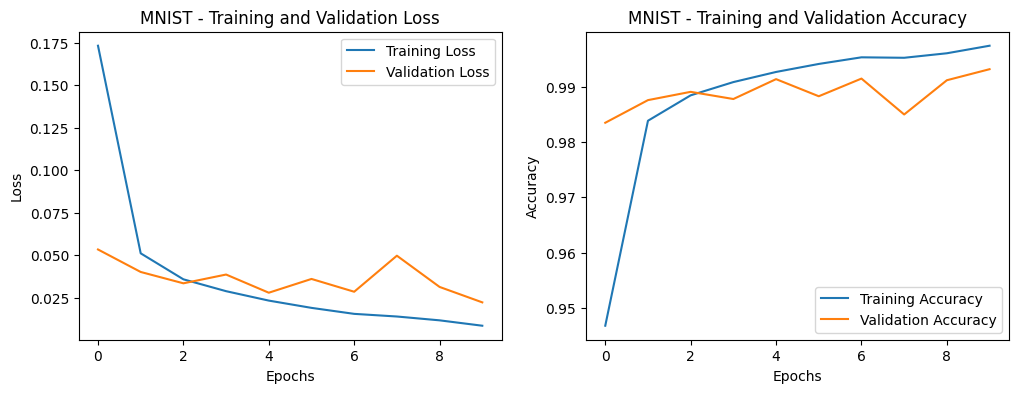

In [ ]:
# Plot training and validation metrics
plt.figure(figsize=(12, 4))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('MNIST - Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('MNIST - Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
# Display best result
best_epoch = np.argmax(history.history['val_accuracy']) + 1
best_val_accuracy = max(history.history['val_accuracy'])
print(f"Best epoch: {best_epoch}")
print(f"Best validation accuracy: {best_val_accuracy:.4f}")

Best epoch: 10
Best validation accuracy: 0.9932


In [ ]:
# Explanation of optimizer choice
print("\nExplanation:\n")
print("Adam optimizer was selected due to its adaptive learning rate mechanism, which combines the advantages of RMSProp and Momentum optimizers.")
print("The learning rate of 0.001 was chosen as it is a standard starting point for Adam, providing a balance between convergence speed and stability.")



Explanation:

Adam optimizer was selected due to its adaptive learning rate mechanism, which combines the advantages of RMSProp and Momentum optimizers.
The learning rate of 0.001 was chosen as it is a standard starting point for Adam, providing a balance between convergence speed and stability.
